## Classificação - Respondendo a pergunta 3: Uma música ou artista influencia similares a subirem no  top 100?

Avaliação utilizando KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df_with_one_hot = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

df_with_genre_list = pd.read_csv('../dataset/songs_with_genre.csv',
                 encoding='iso-8859-1', na_values='unknown')

relevant_genres = pd.read_csv('../dataset/genres_relevant.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [3]:
pd.set_option('display.max_columns', 50)
df_with_one_hot

,date,title,artist,peak_pos,pop,dance pop,pop rap,rap,post-teen pop,hip hop,r&b,contemporary country,southern hip hop,country,country road,urban contemporary,hip pop,trap music,last_pos,weeks,rank,genre,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,6/21/18,all girls are the same,juice wrld,41,0,0,0,1,0,0,0,0,0,0,0,0,0,0,49,5,41,['rap'],0.529,0.0856,161.989,0.3070,0.076900,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.2030,1.0
1,6/21/18,all mine,kanye west,11,0,0,1,1,0,0,0,0,0,0,0,0,0,0,11,2,31,"['pop rap', 'rap']",0.308,0.0933,122.099,0.3380,0.125000,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.2650,0.0
2,6/21/18,back to you,selena gomez,22,1,1,0,0,1,0,0,0,0,0,0,0,0,0,31,5,22,"['dance pop', 'pop', 'post-teen pop']",0.724,0.1200,102.061,0.0486,0.094500,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.5080,1.0
3,6/21/18,be careful,cardi b,11,1,0,0,1,0,0,0,0,0,0,0,0,0,0,25,11,23,"['pop', 'rap']",0.568,0.0952,152.279,0.4110,0.025600,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.5350,0.0
4,6/21/18,beautiful crazy,luke combs,58,0,0,0,0,0,0,0,1,0,0,1,0,0,0,77,4,93,"['contemporary country', 'country road']",0.402,0.0928,103.313,0.0262,0.676000,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.3820,1.0
5,6/21/18,better now,post malone,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,34,7,20,"['pop', 'rap']",0.563,0.1360,145.028,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
6,6/21/18,boo'd up,ella mai,6,1,1,0,0,0,0,1,0,0,0,0,1,0,0,6,11,7,"['dance pop', 'indie r&b', 'pop', 'r&b', 'urba...",0.779,0.0780,81.965,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
7,6/21/18,call out my name,the weeknd,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,52,11,54,"['canadian pop', 'pop', 'rap']",0.599,0.3270,134.144,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
8,6/21/18,chun-li,nicki minaj,10,1,1,1,1,0,0,0,0,0,0,0,0,1,0,46,10,43,"['dance pop', 'hip pop', 'pop', 'pop rap', 'rap']",0.766,0.1070,97.092,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
9,6/21/18,cudi montage,kids see ghosts,69,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,69,"['hip hop', 'pop', 'pop rap', 'rap']",0.504,0.1210,110.011,0.0321,0.401000,0.000001,4.0,0.729,8.0,197001.0,-6.784,0.3050,0.0


In [4]:
train, test = train_test_split(df_with_one_hot, test_size=0.25)

X_train = train[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'tempo', 'speechiness', 'acousticness',
       'time_signature', 'danceability','loudness',
       'valence', 'mode']]
X_test = test[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'tempo', 'speechiness', 'acousticness',
       'time_signature', 'danceability','loudness',
       'valence', 'mode']]

Y_train = train[['peak_pos']]
Y_test = test[['peak_pos']]

In [5]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [6]:
Y_train = Y_train - 1
Y_train = Y_train // 20
Y_train = Y_train + 1
Y_test = Y_test - 1
Y_test = Y_test // 20
Y_test = Y_test+ 1

In [7]:
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [8]:
fold = 0
best = []
for training, validation in skf.split(X_train, Y_train):
    X_tt = X_train[training]
    y_tt = Y_train[training]
    X_v = X_train[validation]
    y_v = Y_train[validation]
    best_iter = (0, 0)
    for nn in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]: # Vamos testar tais valores de n
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) # treina no conjunto de treino
        y_pv = model.predict(X_v) # previsões no conjunto de validação
        
        # Resultado com melhor acurácia!
        accuracy = accuracy_score(y_v, y_pv)
        if accuracy > best_iter[0]:
            best_iter = (accuracy, nn)
    
    best.append(best_iter[1])
    fold += 1
    print('Fold-{}, melhor n = {}, acc = {}'.format(fold, best_iter[1], best_iter[0]))

Fold-1, melhor n = 3, acc = 0.2878787878787879
Fold-2, melhor n = 5, acc = 0.2803030303030303
Fold-3, melhor n = 4, acc = 0.2689393939393939
Fold-4, melhor n = 6, acc = 0.2765151515151515
Fold-5, melhor n = 20, acc = 0.2727272727272727
Fold-6, melhor n = 6, acc = 0.29924242424242425
Fold-7, melhor n = 10, acc = 0.2840909090909091
Fold-8, melhor n = 7, acc = 0.24242424242424243
Fold-9, melhor n = 4, acc = 0.2878787878787879
Fold-10, melhor n = 6, acc = 0.24621212121212122
Fold-11, melhor n = 9, acc = 0.2623574144486692
Fold-12, melhor n = 7, acc = 0.2813688212927757
Fold-13, melhor n = 5, acc = 0.28517110266159695
Fold-14, melhor n = 3, acc = 0.2737642585551331
Fold-15, melhor n = 6, acc = 0.30916030534351147
Fold-16, melhor n = 20, acc = 0.2786259541984733
Fold-17, melhor n = 9, acc = 0.33587786259541985
Fold-18, melhor n = 9, acc = 0.3038461538461538
Fold-19, melhor n = 4, acc = 0.2653846153846154
Fold-20, melhor n = 20, acc = 0.3127413127413127


In [11]:
intMedian = int(np.mean(best))

modelKNN = KNeighborsClassifier(n_neighbors=intMedian)
modelKNN.fit(X_train, Y_train)

print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.32      0.52      0.40       448
           2       0.19      0.15      0.16       317
           3       0.25      0.20      0.23       347
           4       0.16      0.13      0.14       318
           5       0.20      0.15      0.18       323

    accuracy                           0.25      1753
   macro avg       0.22      0.23      0.22      1753
weighted avg       0.23      0.25      0.23      1753



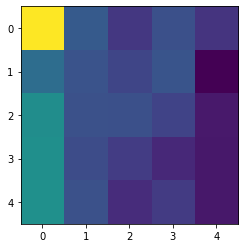

In [10]:
values=np.arange(10)+1

plt.imshow(confusion_matrix(Y_test, modelKNN.predict(X_test)))
